In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df2 = df1.drop(['area_type','availability','society'],axis =1)

In [7]:
df2.head(10)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,NaN,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00


In [8]:
df2.isnull().sum() 

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df3 = df2.dropna()

In [10]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
df3.shape

(12710, 6)

In [12]:
df3.head(10)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25
10,Whitefield,3 BHK,1800,2.0,2.0,70.00
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00
12,7th Phase JP Nagar,2 BHK,1000,2.0,1.0,38.00


In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [14]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Himanshu\AppData\Local\Temp/ipykernel_14464/2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [16]:
df3[df3.bhk>10]

,location,size,total_sqft,bath,balcony,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,3.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,0.0,170.0,11
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,3.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,0.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,2.0,300.0,12
9935,1Hoysalanagar,13 BHK,5425,13.0,0.0,275.0,13


In [17]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def float_converter(a):
    try :
        x = float(a)
    except:
        return False
    return True

In [19]:
checker = float_converter("abc")
checker

False

In [20]:
df3[~df3['total_sqft'].apply(float_converter)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [21]:
def averaged(val):
    a = val.split('-')
    if len(a) == 2:
        return (float(a[0])+float(a[1]))/2
    try:
        return float(val)
    except:
        return None  

In [22]:
df4 = df3.copy()

In [23]:
df4['total_sqft'] = df3['total_sqft'].apply(averaged)

In [24]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [25]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [26]:
len(df4.location.unique())

1265

In [27]:
location_stat = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [28]:
location_stat.head()

location
Whitefield         514
Sarjapur  Road     372
Electronic City    300
Kanakpura Road     261
Thanisandra        231
Name: location, dtype: int64

In [29]:
location_stat.tail()

location
Kalhalli                1
Kalkere Channasandra    1
 Banaswadi              1
Kamdhenu Nagar          1
whitefiled              1
Name: location, dtype: int64

In [30]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [31]:
len(location_stat[location_stat<=10])

1028

In [32]:
location_less_than_ten = location_stat[location_stat<=10]
len(location_less_than_ten)

1028

In [33]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_less_than_ten else x)

In [34]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [35]:
len(df4.location.unique())

238

In [36]:
df5 = df4.copy()

In [37]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [38]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [39]:
df5[df5.total_sqft/df5.bhk<300]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...
13219,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [40]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [41]:
df6.shape

(12055, 8)

In [42]:
df6.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [43]:
df6.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12013.000000,12055.000000,12055.000000,12055.000000,12055.000000,12013.000000
mean,1542.315982,2.513231,1.586230,105.120959,2.608461,6206.082347
std,1181.094228,1.009891,0.809461,134.149494,0.927608,3985.518807
min,300.000000,1.000000,0.000000,9.000000,1.000000,267.829813
25%,1107.000000,2.000000,1.000000,48.450000,2.000000,4199.363057
50%,1285.000000,2.000000,2.000000,68.000000,2.000000,5252.525253
75%,1660.000000,3.000000,2.000000,110.000000,3.000000,6823.529412
max,52272.000000,13.000000,3.000000,2912.000000,13.000000,176470.588235


In [44]:
def remove_pricepersqft_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        redu_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,redu_df],ignore_index = True)
    return df_out

In [45]:
df7 = remove_pricepersqft_outliers(df6)

df7.shape

(9849, 8)

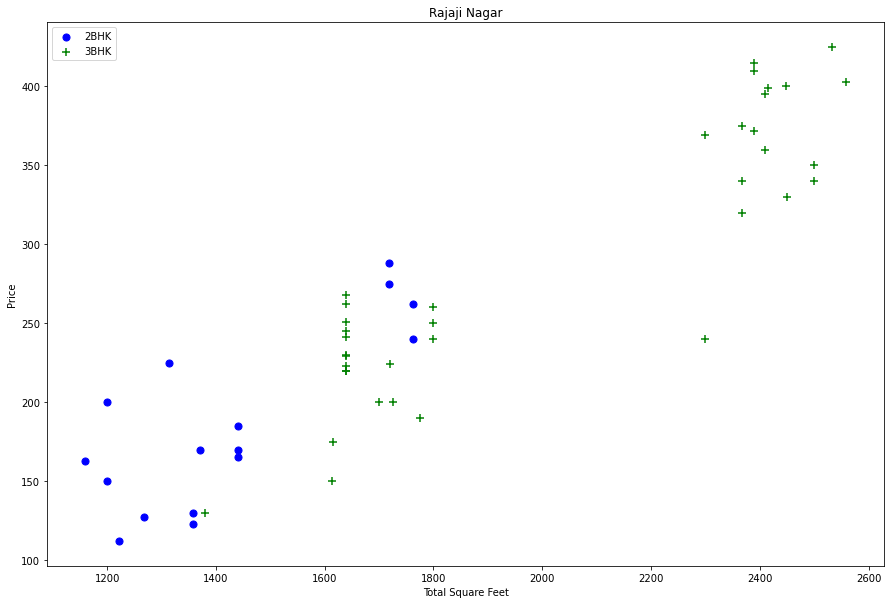

In [46]:
def scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color ='blue',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+' ,color ='green',label='3BHK',s=50)
    plt.xlabel("Total Square Feet")
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
scatter_plot(df7,"Rajaji Nagar")    

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape [0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7038, 8)

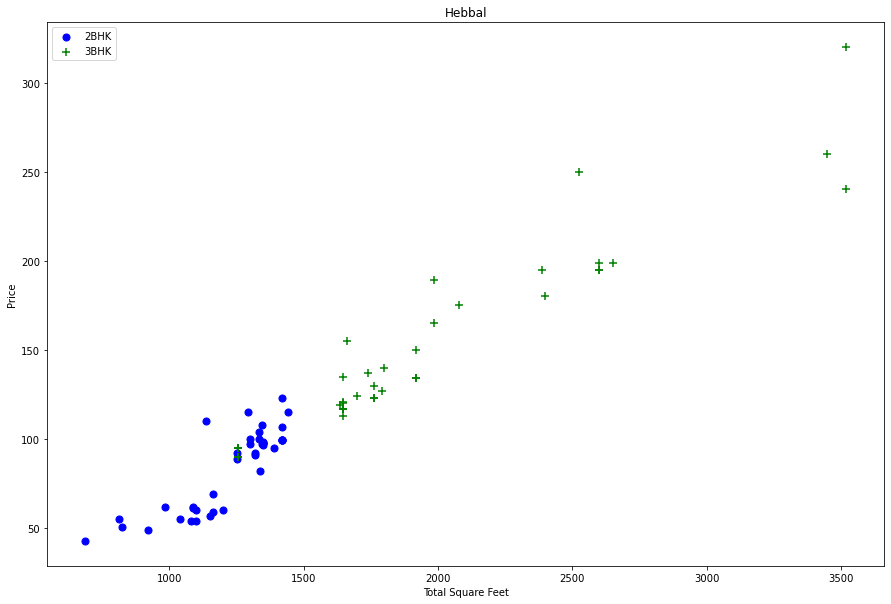

In [48]:
scatter_plot(df8,'Hebbal')

Text(0, 0.5, 'Count')

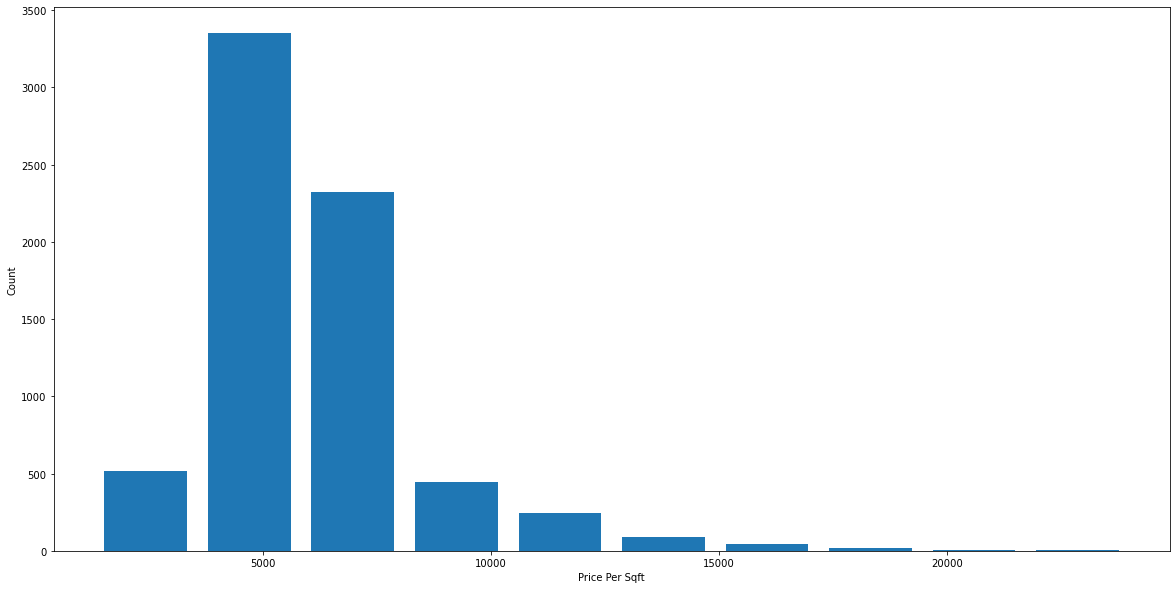

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth= 0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")

In [50]:
df8.bath.unique()

array([ 2.,  3.,  4.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [51]:
df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9269,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [52]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1552,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6439,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8083,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [53]:
df9 = df8[df8.bath<df8.bhk+2]

In [54]:
df9.shape

(6971, 8)

In [55]:
df10 = df9.drop(['size','price_per_sqft'],axis = 1)
df10.head()

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2


In [56]:
dummies = pd.get_dummies(df10.location)

In [57]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df11 = pd.concat([df10,dummies.drop('other',axis = 'columns')],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df12 = df11.drop('location',axis =1)
df12.head()

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df12.shape

(6971, 242)

In [61]:
X = df12.drop('price',axis = 'columns')
X.head()

,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
Y = df12.price
Y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [64]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8535185743272221

In [65]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [67]:
def find_best_model(X,Y):
    algos = {
        'linear_regrssion' : {
            'model': LinearRegression(),
            'params' : {
                'normalize' :[True,False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params' : {
                'alpha' :[1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree':{
            'model' : DecisionTreeRegressor(),
            'params' :{
                'criterion' : ['mse' ,' friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    } 
    
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv = cv,return_train_score =False)
        gs.fit(X,Y)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns = ['model','best_score','best_params'])    

In [68]:
find_best_model(X,Y)

C:\Users\Himanshu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Himanshu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Himanshu\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\Himanshu\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: ' friedman_mse'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Himanshu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

,model,best_score,best_params
0,linear_regrssion,0.815668,{'normalize': False}
1,lasso,0.691839,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.697620,"{'criterion': 'mse', 'splitter': 'random'}"


In [69]:
def pred_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]    

In [70]:
pred_price('Electronic City Phase II',1056,2,2)

39.710339888258474

In [71]:
pred_price('Devanahalli',1580,3,2)

92.9744002899202

In [72]:
import pickle
with open('property_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [73]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json",'w') as f:
    f.write(json.dumps(columns))